In [20]:
# Impor the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Unzip-Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-11.093814828795686 149.6755857512407
-4.5214030727245245 117.37691388197857
79.05754917828173 141.6687180410371
-18.9249994192227 -146.2289661939672
31.66584668111335 -90.68266259830114
-63.862658157089776 172.92522195018904
-81.86634146387514 -107.44974688821684
-86.5131773682731 58.46907340546082
-35.3909140921063 -179.64187291879745
22.95235954121908 -153.79000598994838
-56.78294175178532 -48.02763336344742
-1.7880413181237316 -29.76227702024181
-82.95048412919328 45.982566406673925
66.392572824995 -93.83827446925645
23.827488889063787 -6.449456263718048
-69.30421203772005 -35.67201743459674
11.89690083772625 119.63887761287128
-69.98419378232549 -41.70618127164326
1.4359633535587193 115.60868087088818
-19.877569882212327 -176.5306241224864
14.16769938943709 -0.5429422553841619
-77.69532986121928 104.48377969639517
39.96882173070148 55.600612896770116
-50.32419803609671 -52.20567822594768
24.15069784335418 157.51025301875256
67.2994692024811 14.80670600319462
-16.885386066330085 -1

-65.77580618422243 -85.17986407324626
-45.50826045375943 -28.034012787190306
16.384601057112917 179.51795464430006
-44.42415553060825 40.4472630127249
20.953122982516675 104.10393163333458
62.31326788662051 -129.8649619978531
-28.64040780487702 -50.732226410072144
-50.76731888683711 -116.39532804520698
65.60242144197869 20.124849727198836
-13.51448518218072 94.38847621449548
5.85281473479715 -45.63995276345588
3.23293085033103 -79.91112805398579
26.01902479508493 -161.64378245094431
-57.61042674043692 48.81977987993528
64.5467457096533 -172.1631301220167
27.596920783828352 -33.59213792426132
-6.472229164843938 -122.30700302967198
-58.106106888682795 -26.62376823347219
-66.53907736633438 -118.49690856612136
-68.77280561357567 -154.19779451385097
21.371479059345788 -0.3705647804412706
5.242266303370997 89.32792554067765
-55.313599585704665 118.84563408871827
-17.71887130854097 164.12618173736627
59.64811634652233 -106.5238459680487
29.294442091155148 -4.7376517435245376
44.50132827103795

-32.09637133154549 6.192744846960551
68.84960219120455 158.3663142337357
-60.563267399917386 -61.485373718770134
38.13366411665143 122.80177409320072
34.25213935292291 68.3664033929492
80.51415058747767 129.55133639327278
-19.176984891754913 -175.1873787947646
65.71382302817636 121.86216639753843
-56.46549847076 -86.63530625994758
5.802150451814867 4.6186883086990065
52.38718347033736 87.19249546788512
34.481580676343285 45.758274069092124
25.461389179001486 177.3150316140779
79.3551792568928 -77.58708167174046
9.675036548201092 -140.3540773257245
53.384824656323644 101.5270904890321
0.188388954206701 8.570256614308988
-18.03304764450887 50.22756365337813
-53.649057094300915 -161.98356919133425
-54.04995593779635 74.73233879445075
-87.77170708497754 -16.91206018141179
-81.11530185479378 -35.89478806614568
-73.01314987378395 -89.71654045026216
33.313345051180264 -67.72437976612294
-68.5651977986452 -43.07451762404892
69.8567953110306 -33.80332986135818
62.55240044486112 -143.23412816270

In [24]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [25]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

602

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [28]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | alotau
City not found. Skipping...
Processing Record 2 of Set 13 | majene
Processing Record 3 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 13 | tautira
Processing Record 5 of Set 13 | brookhaven
Processing Record 6 of Set 13 | kaitangata
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | east london
Processing Record 9 of Set 13 | vaini
Processing Record 10 of Set 13 | kahului
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | touros
Processing Record 13 of Set 13 | port alfred
Processing Record 14 of Set 13 | thompson
Processing Record 15 of Set 13 | taoudenni
Processing Record 16 of Set 13 | panlaitan
Processing Record 17 of Set 13 | bontang
Processing Record 18 of Set 13 | gorom-gorom
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | gazanjyk
Processing Record 21 of Set 13 | mar del plata

Processing Record 36 of Set 16 | nexo
Processing Record 37 of Set 16 | vila franca do campo
Processing Record 38 of Set 16 | fort-shevchenko
Processing Record 39 of Set 16 | blagoyevo
Processing Record 40 of Set 16 | albion
Processing Record 41 of Set 16 | sabang
Processing Record 42 of Set 16 | eufaula
Processing Record 43 of Set 16 | ketchikan
Processing Record 44 of Set 16 | mount gambier
Processing Record 45 of Set 16 | springbok
Processing Record 46 of Set 16 | kodiak
Processing Record 47 of Set 16 | sur
Processing Record 48 of Set 16 | meulaboh
Processing Record 49 of Set 16 | cayenne
Processing Record 50 of Set 16 | arraial do cabo
Processing Record 1 of Set 17 | balabac
Processing Record 2 of Set 17 | tutoia
Processing Record 3 of Set 17 | upernavik
Processing Record 4 of Set 17 | uni
Processing Record 5 of Set 17 | kolokani
Processing Record 6 of Set 17 | coquimbo
Processing Record 7 of Set 17 | vao
Processing Record 8 of Set 17 | carnarvon
Processing Record 9 of Set 17 | cali

Processing Record 25 of Set 20 | mosquera
Processing Record 26 of Set 20 | provideniya
Processing Record 27 of Set 20 | banda aceh
Processing Record 28 of Set 20 | poum
Processing Record 29 of Set 20 | mrirt
City not found. Skipping...
Processing Record 30 of Set 20 | hailin
Processing Record 31 of Set 20 | kapit
Processing Record 32 of Set 20 | tikrit
Processing Record 33 of Set 20 | acapulco
Processing Record 34 of Set 20 | grimari
City not found. Skipping...
Processing Record 35 of Set 20 | colares
Processing Record 36 of Set 20 | khasan
Processing Record 37 of Set 20 | vytegra
Processing Record 38 of Set 20 | ukiah
Processing Record 39 of Set 20 | uige
Processing Record 40 of Set 20 | bhadrachalam
Processing Record 41 of Set 20 | calabozo
Processing Record 42 of Set 20 | litoral del san juan
City not found. Skipping...
Processing Record 43 of Set 20 | hanna
Processing Record 44 of Set 20 | flinders
Processing Record 45 of Set 20 | imbituba
Processing Record 46 of Set 20 | cowra
Pro

Processing Record 12 of Set 24 | sataua
City not found. Skipping...
Processing Record 13 of Set 24 | katobu
Processing Record 14 of Set 24 | klyuchi
Processing Record 15 of Set 24 | cumaribo
City not found. Skipping...
Processing Record 16 of Set 24 | yining
Processing Record 17 of Set 24 | basco
Processing Record 18 of Set 24 | singaraja
Processing Record 19 of Set 24 | mporokoso
Processing Record 20 of Set 24 | khandyga
Processing Record 21 of Set 24 | barbar
City not found. Skipping...
Processing Record 22 of Set 24 | cervo
Processing Record 23 of Set 24 | san juan
Processing Record 24 of Set 24 | hirara
Processing Record 25 of Set 24 | neryungri
Processing Record 26 of Set 24 | sungai besar
Processing Record 27 of Set 24 | kozienice
Processing Record 28 of Set 24 | progreso
Processing Record 29 of Set 24 | itarema
Processing Record 30 of Set 24 | bonavista
Processing Record 31 of Set 24 | ornskoldsvik
Processing Record 32 of Set 24 | alofi
Processing Record 33 of Set 24 | parfino
P

In [30]:
len(city_data)

559

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Majene,-3.5403,118.9707,76.77,90,100,7.72,ID,2022-02-12 12:18:33
1,Tautira,-17.7333,-149.1500,75.22,75,100,13.33,PF,2022-02-12 12:18:33
2,Brookhaven,31.5791,-90.4407,47.35,89,19,3.94,US,2022-02-12 12:18:34
3,Kaitangata,-46.2817,169.8464,51.93,71,96,7.40,NZ,2022-02-12 12:18:34
4,Punta Arenas,-53.1500,-70.9167,55.51,58,20,23.02,CL,2022-02-12 12:18:35
5,East London,-33.0153,27.9116,83.34,78,40,14.97,ZA,2022-02-12 12:18:35
6,Vaini,-21.2000,-175.2000,78.96,94,20,4.61,TO,2022-02-12 12:18:35
7,Kahului,20.8947,-156.4700,72.84,83,0,4.00,US,2022-02-12 12:18:36
8,Ushuaia,-54.8000,-68.3000,51.42,87,75,43.73,AR,2022-02-12 12:18:36
9,Touros,-5.1989,-35.4608,76.10,69,89,8.70,BR,2022-02-12 12:18:37


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Majene,ID,2022-02-12 12:18:33,-3.5403,118.9707,76.77,90,100,7.72
1,Tautira,PF,2022-02-12 12:18:33,-17.7333,-149.1500,75.22,75,100,13.33
2,Brookhaven,US,2022-02-12 12:18:34,31.5791,-90.4407,47.35,89,19,3.94
3,Kaitangata,NZ,2022-02-12 12:18:34,-46.2817,169.8464,51.93,71,96,7.40
4,Punta Arenas,CL,2022-02-12 12:18:35,-53.1500,-70.9167,55.51,58,20,23.02
5,East London,ZA,2022-02-12 12:18:35,-33.0153,27.9116,83.34,78,40,14.97
6,Vaini,TO,2022-02-12 12:18:35,-21.2000,-175.2000,78.96,94,20,4.61
7,Kahului,US,2022-02-12 12:18:36,20.8947,-156.4700,72.84,83,0,4.00
8,Ushuaia,AR,2022-02-12 12:18:36,-54.8000,-68.3000,51.42,87,75,43.73
9,Touros,BR,2022-02-12 12:18:37,-5.1989,-35.4608,76.10,69,89,8.70


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

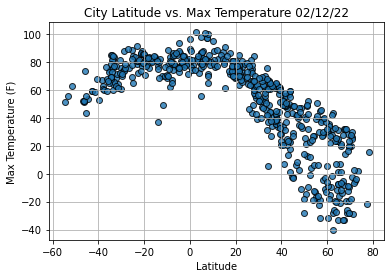

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

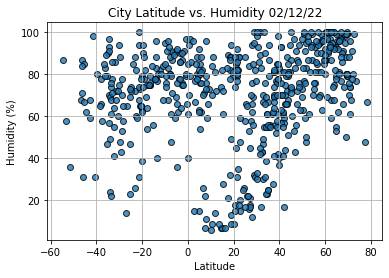

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

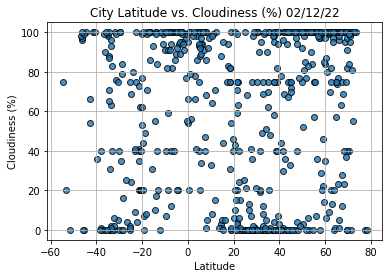

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

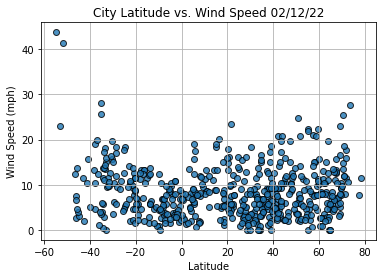

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()